In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import pandas 
import numpy 
import yaml
import xarray 
import pathlib
import geopandas as gpd
import time
import sys

In [2]:
def band_pass_avg(window,variable):
    var_avg_bandpass = []
    i=0
    while i < (len(variable)):
        if i < (len(variable)-window):
            var_avg=variable[i:i+window].mean()
        else:
            var_avg=numpy.NaN
        var_avg_bandpass.append(var_avg)
        i+=1
    return var_avg_bandpass

## Load configuration file for netcdf variables

In [3]:
with open('../etc/SSM_config_whidbey.yaml', 'r') as config_file:
    ssm = yaml.safe_load(config_file) 

with open('../etc/SSM_netcdf_config.yaml', 'r') as config_file:
    ssm_nc = yaml.safe_load(config_file) 

In [4]:
var_list = [*ssm_nc['label_dict']]

## Graphical display information

In [5]:
mpl.rc('font', size=11)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=16)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

In [6]:
# create date vector
dti = pandas.date_range("2014-01-01", periods=24*366, freq="H")

In [7]:
variable = 'netPP'
inlet = "Bellingham Bay"
input_netcdf_dir = pathlib.Path(f'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/NPP_workshop_120622/{inlet.split(" ")[0]}')
input_file = input_netcdf_dir/f"{variable}_{inlet.split(' ')[0]}_TS.nc"
with xarray.open_dataset(input_file) as ds:
    print([*ds])
    #ts2d=ds[f'{variable}_median']

['netPP_median', 'netPP_quantile_0', 'netPP_quantile_100', 'netPP_quantile_10', 'netPP_quantile_90']


In [8]:
#ssm_nc['inlet_colors']
variable_list_1 = ["temp","salinity","zeta"] #physical environment 
variable_list_2 = ["netPP","B1","B2","NO3","DOXG"]

# plot up physical environment

['temp_median', 'temp_quantile_0', 'temp_quantile_100', 'temp_quantile_10', 'temp_quantile_90']


/tmp/ipykernel_45445/3611908316.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['salinity_median', 'salinity_quantile_0', 'salinity_quantile_100', 'salinity_quantile_10', 'salinity_quantile_90']


/tmp/ipykernel_45445/3611908316.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['zeta_median', 'zeta_quantile_0', 'zeta_quantile_100', 'zeta_quantile_10', 'zeta_quantile_90']


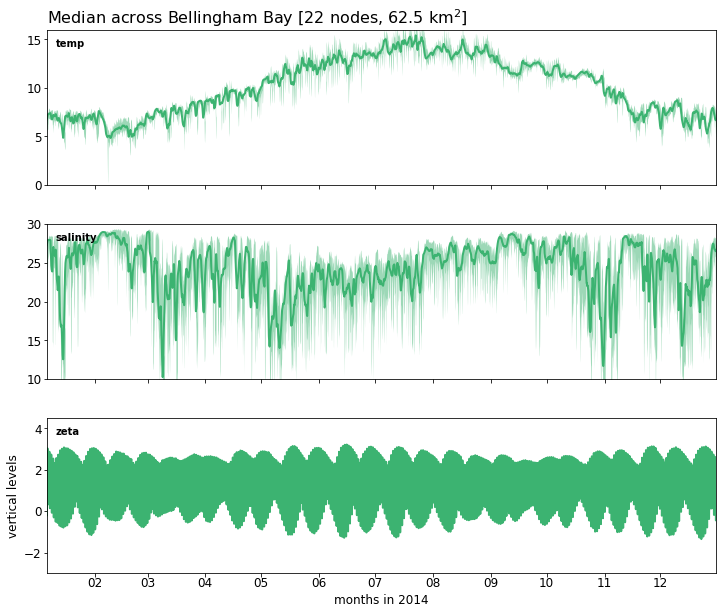

['temp_median', 'temp_quantile_0', 'temp_quantile_100', 'temp_quantile_10', 'temp_quantile_90']


/tmp/ipykernel_45445/3611908316.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['salinity_median', 'salinity_quantile_0', 'salinity_quantile_100', 'salinity_quantile_10', 'salinity_quantile_90']


/tmp/ipykernel_45445/3611908316.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['zeta_median', 'zeta_quantile_0', 'zeta_quantile_100', 'zeta_quantile_10', 'zeta_quantile_90']


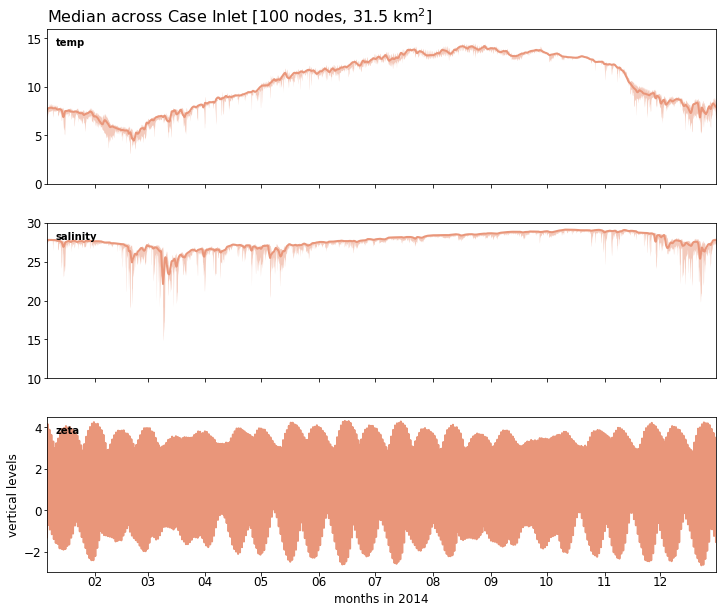

['temp_median', 'temp_quantile_0', 'temp_quantile_100', 'temp_quantile_10', 'temp_quantile_90']


/tmp/ipykernel_45445/3611908316.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['salinity_median', 'salinity_quantile_0', 'salinity_quantile_100', 'salinity_quantile_10', 'salinity_quantile_90']


/tmp/ipykernel_45445/3611908316.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['zeta_median', 'zeta_quantile_0', 'zeta_quantile_100', 'zeta_quantile_10', 'zeta_quantile_90']


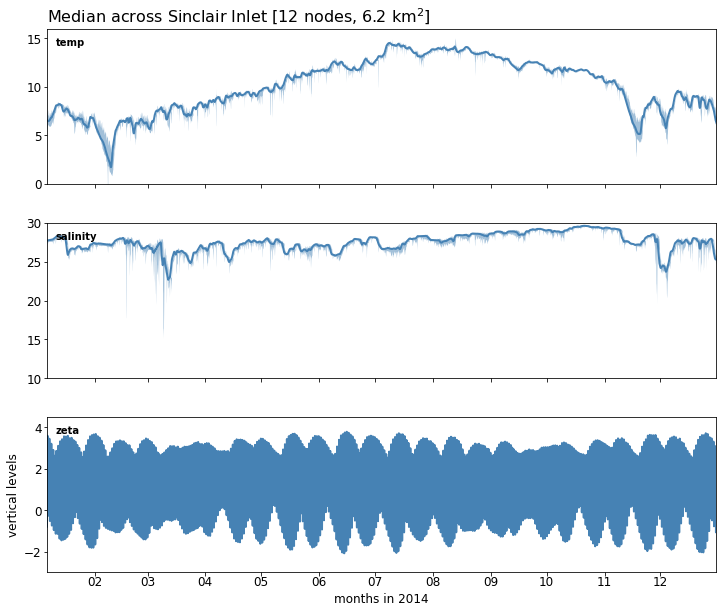

In [9]:
for inlet in ["Bellingham Bay", "Case Inlet", "Sinclair Inlet"]:
    input_netcdf_dir = pathlib.Path(f'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/NPP_workshop_120622/{inlet.split(" ")[0]}')
    fig, axs = plt.subplots(3,1, figsize = (12,4*5/2),
    gridspec_kw={
       'width_ratios': [1],
       'height_ratios': [1,1,1], 
        'wspace': 0.25,
        'hspace': 0.25})
    plot_index=0
    for variable in variable_list_1:
        input_file = input_netcdf_dir/f"{variable}_{inlet.split(' ')[0]}_TS.nc"
        with xarray.open_dataset(input_file) as ds:
            print([*ds])
            ts_full=ds[f'{variable}_median']
            ts_10 = ds[f'{variable}_quantile_10']
            ts_90 = ds[f'{variable}_quantile_90']
            # for stat in ["min","max"]:
            #     mn = getattr(numpy,stat)(ds[f'{variable}']).item()
            #     output_df[f"{stat_type} {stat}"][variable] = mn
        if variable in ["temp", "salinity"]:
            ts = band_pass_avg(24,ts_full)
        else:
            ts = ts_full#band_pass_avg(24,ts_full)
        #create mesh
        axs[plot_index].plot(dti,ts,color=ssm_nc['inlet_colors'][inlet], lw=2)
        axs[plot_index].fill_between(
            dti, 
            ts_10,
            ts_90,
            color=ssm_nc['inlet_colors'][inlet], 
            alpha=0.5, 
            lw=0
        )
        # set x-ticks with x-ticklabels to the first day of the month
        axs[plot_index].set_xlim(numpy.datetime64('2014-01-06'), numpy.datetime64('2014-12-31'))
        axs[plot_index].set_ylim([ssm_nc['y_limits_median'][variable][0],ssm_nc['y_limits_median'][variable][1]])
        axs[plot_index].xaxis.set_major_locator(mpl.dates.MonthLocator())
        axs[plot_index].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m'))
        if plot_index==2:
            axs[plot_index].set_xlabel('months in 2014')
            axs[plot_index].set_ylabel(f"vertical levels")
        else:
             axs[plot_index].set_xticklabels([''])

        # Add veriable label
        anchored_text = AnchoredText(
            variable, 
            loc='upper left',
            frameon=False,
            prop=dict(fontweight="bold",color="black")
        )
        axs[plot_index].add_artist(anchored_text) 
        if plot_index==0:
            axs[plot_index].set_title(f"Median across {inlet} [{ssm_nc['inlet_nodes'][inlet]} nodes, {ssm_nc['inlet_area_km2'][inlet]} km$^2$]",loc='left')
        plot_index+=1
    plt.savefig(pathlib.Path(ssm['paths']['graphics'])/'NPP_workshop_120622'/f"Median_{inlet.split(' ')[0]}_TS_Physical4panel.png",
                bbox_inches='tight',format='png', dpi = 750)
    plt.show()


# plot up NPP parameters

['netPP_median', 'netPP_quantile_0', 'netPP_quantile_100', 'netPP_quantile_10', 'netPP_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['B1_median', 'B1_quantile_0', 'B1_quantile_100', 'B1_quantile_10', 'B1_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['B2_median', 'B2_quantile_0', 'B2_quantile_100', 'B2_quantile_10', 'B2_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['NO3_median', 'NO3_quantile_0', 'NO3_quantile_100', 'NO3_quantile_10', 'NO3_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['DOXG_median', 'DOXG_quantile_0', 'DOXG_quantile_100', 'DOXG_quantile_10', 'DOXG_quantile_90']


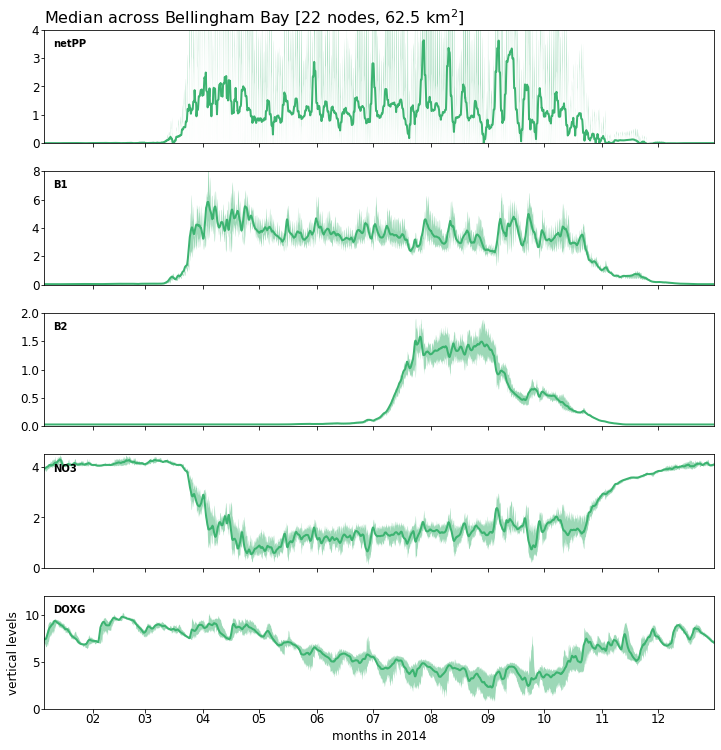

['netPP_median', 'netPP_quantile_0', 'netPP_quantile_100', 'netPP_quantile_10', 'netPP_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['B1_median', 'B1_quantile_0', 'B1_quantile_100', 'B1_quantile_10', 'B1_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['B2_median', 'B2_quantile_0', 'B2_quantile_100', 'B2_quantile_10', 'B2_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['NO3_median', 'NO3_quantile_0', 'NO3_quantile_100', 'NO3_quantile_10', 'NO3_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['DOXG_median', 'DOXG_quantile_0', 'DOXG_quantile_100', 'DOXG_quantile_10', 'DOXG_quantile_90']


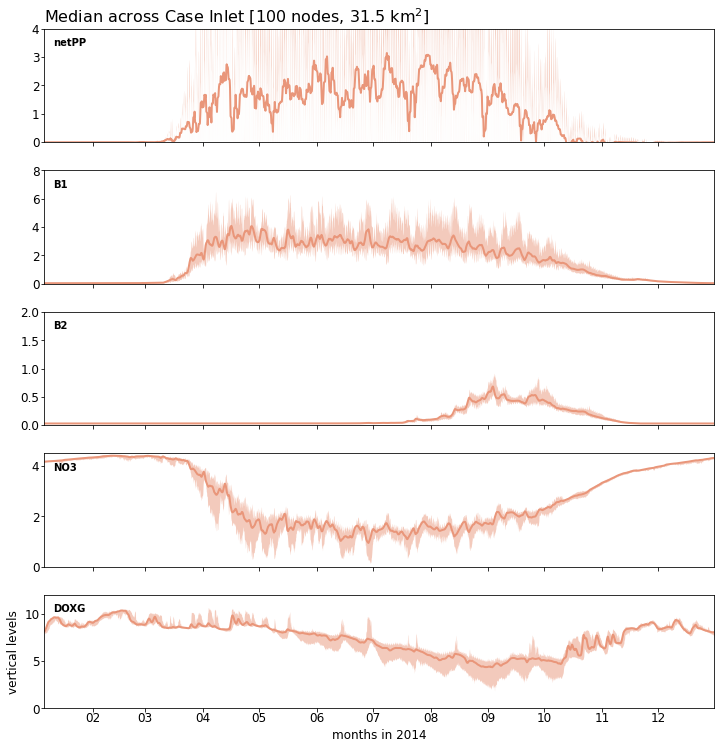

['netPP_median', 'netPP_quantile_0', 'netPP_quantile_100', 'netPP_quantile_10', 'netPP_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['B1_median', 'B1_quantile_0', 'B1_quantile_100', 'B1_quantile_10', 'B1_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['B2_median', 'B2_quantile_0', 'B2_quantile_100', 'B2_quantile_10', 'B2_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['NO3_median', 'NO3_quantile_0', 'NO3_quantile_100', 'NO3_quantile_10', 'NO3_quantile_90']


/tmp/ipykernel_45445/4167405224.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['DOXG_median', 'DOXG_quantile_0', 'DOXG_quantile_100', 'DOXG_quantile_10', 'DOXG_quantile_90']


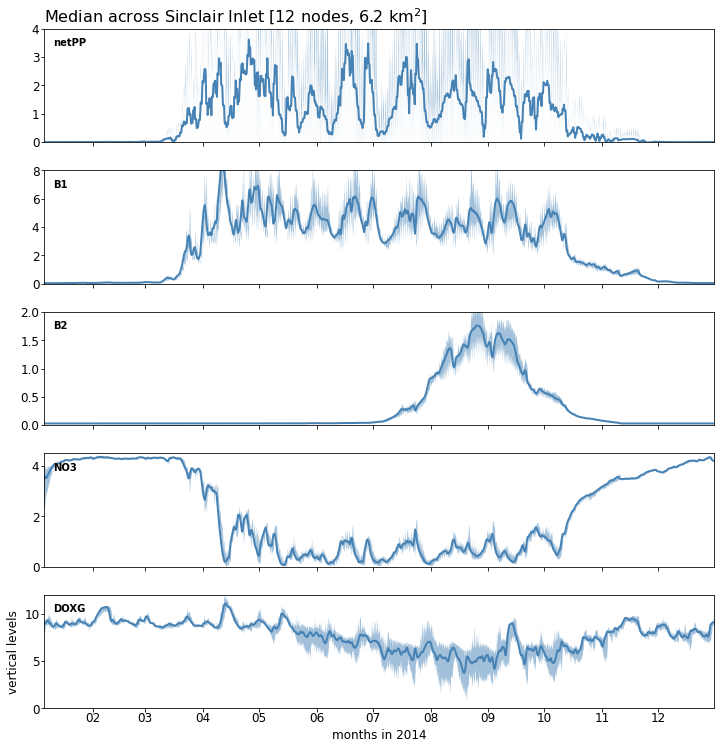

In [10]:
for inlet in ["Bellingham Bay", "Case Inlet", "Sinclair Inlet"]:
    input_netcdf_dir = pathlib.Path(f'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/NPP_workshop_120622/{inlet.split(" ")[0]}')
    fig, axs = plt.subplots(5,1, figsize = (12,5*5/2),
    gridspec_kw={
       'width_ratios': [1],
       'height_ratios': [1,1,1,1,1], 
        'wspace': 0.25,
        'hspace': 0.25})
    plot_index=0
    for variable in variable_list_2:
        input_file = input_netcdf_dir/f"{variable}_{inlet.split(' ')[0]}_TS.nc"
        with xarray.open_dataset(input_file) as ds:
            print([*ds])
            ts_full=ds[f'{variable}_median']
            ts_10 = ds[f'{variable}_quantile_10']
            ts_90 = ds[f'{variable}_quantile_90']
            
            # for stat in ["min","max"]:
            #     mn = getattr(numpy,stat)(ds[f'{variable}']).item()
            #     output_df[f"{stat_type} {stat}"][variable] = mn
        ts = band_pass_avg(24,ts_full)
        #create mesh
        axs[plot_index].plot(dti,ts,color=ssm_nc['inlet_colors'][inlet], lw=2)
        axs[plot_index].fill_between(
            dti, 
            ts_10,
            ts_90,
            color=ssm_nc['inlet_colors'][inlet], 
            alpha=0.5, 
            lw=0
        )
        # set x-ticks with x-ticklabels to the first day of the month
        axs[plot_index].set_xlim(numpy.datetime64('2014-01-06'), numpy.datetime64('2014-12-31'))
        axs[plot_index].set_ylim([ssm_nc['y_limits_median'][variable][0],ssm_nc['y_limits_median'][variable][1]])
        axs[plot_index].xaxis.set_major_locator(mpl.dates.MonthLocator())
        axs[plot_index].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m'))
        if plot_index==4:
            axs[plot_index].set_xlabel('months in 2014')
            axs[plot_index].set_ylabel(f"vertical levels")
        else:
             axs[plot_index].set_xticklabels([''])

        # Add veriable label
        anchored_text = AnchoredText(
            variable, 
            loc='upper left',
            frameon=False,
            prop=dict(fontweight="bold",color="black")
        )
        axs[plot_index].add_artist(anchored_text) 
        if plot_index==0:
            axs[plot_index].set_title(f"Median across {inlet} [{ssm_nc['inlet_nodes'][inlet]} nodes, {ssm_nc['inlet_area_km2'][inlet]} km$^2$]",loc='left')
        plot_index+=1
    plt.savefig(pathlib.Path(ssm['paths']['graphics'])/'NPP_workshop_120622'/f"Median_{inlet.split(' ')[0]}_TS_5panel.png",
            bbox_inches='tight',format='png', dpi = 750)
    plt.show()


['B1_median', 'B1_quantile_0', 'B1_quantile_1']
['B2_median', 'B2_quantile_0', 'B2_quantile_1']
['DOXG_median', 'DOXG_quantile_0', 'DOXG_quantile_1']
['NO3_median', 'NO3_quantile_0', 'NO3_quantile_1']


/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['salinity_median', 'salinity_quantile_0', 'salinity_quantile_1']
['temp_median', 'temp_quantile_0', 'temp_quantile_1']


/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


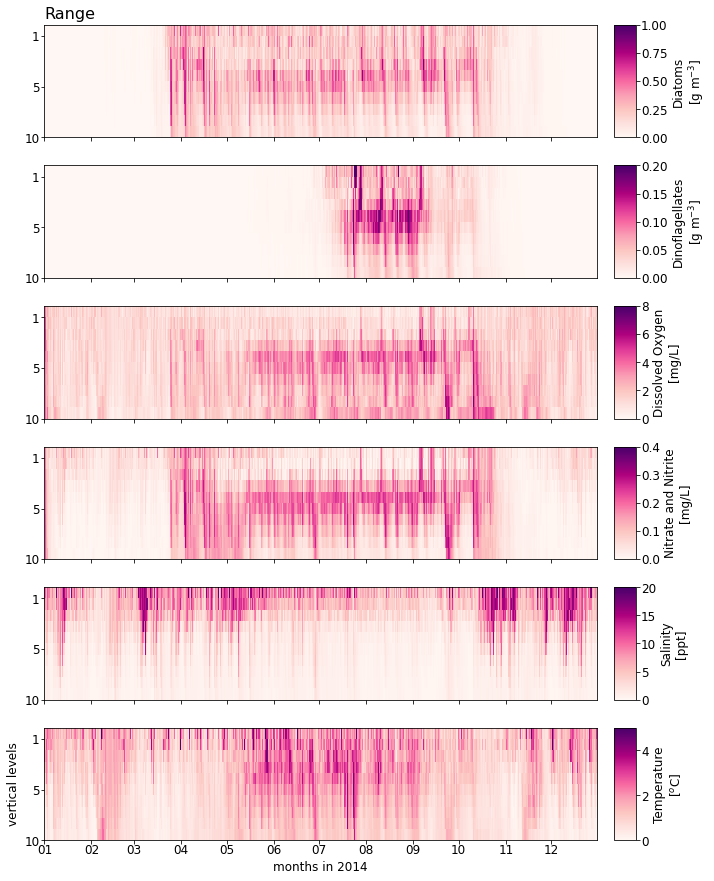

['B1_median', 'B1_quantile_0', 'B1_quantile_1']
['B2_median', 'B2_quantile_0', 'B2_quantile_1']
['DOXG_median', 'DOXG_quantile_0', 'DOXG_quantile_1']
['NO3_median', 'NO3_quantile_0', 'NO3_quantile_1']
['salinity_median', 'salinity_quantile_0', 'salinity_quantile_1']


/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['temp_median', 'temp_quantile_0', 'temp_quantile_1']


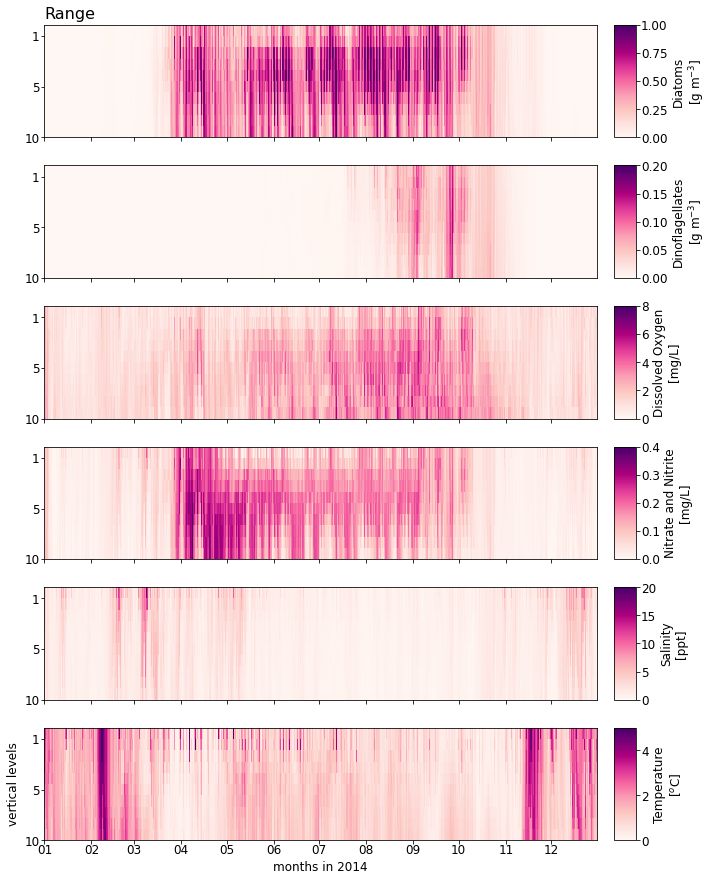

['B1_median', 'B1_quantile_0', 'B1_quantile_1']
['B2_median', 'B2_quantile_0', 'B2_quantile_1']
['DOXG_median', 'DOXG_quantile_0', 'DOXG_quantile_1']
['NO3_median', 'NO3_quantile_0', 'NO3_quantile_1']
['salinity_median', 'salinity_quantile_0', 'salinity_quantile_1']


/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])
/tmp/ipykernel_45445/2170409800.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plot_index].set_xticklabels([''])


['temp_median', 'temp_quantile_0', 'temp_quantile_1']


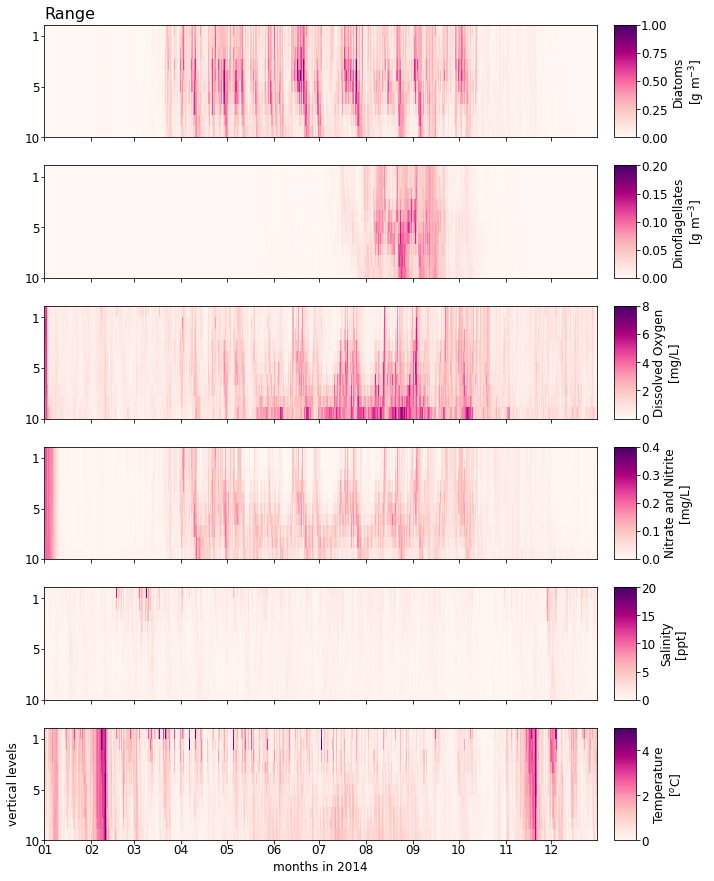

In [11]:
stat_type = "range"
for inlet in ["Bellingham Bay", "Case Inlet", "Sinclair Inlet"]:
    input_netcdf_dir = pathlib.Path(f'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/NPP_workshop_120622/{inlet.split(" ")[0]}')
    fig, axs = plt.subplots(6,1, figsize = (12,5*6/2),
    gridspec_kw={
       'width_ratios': [1],
       'height_ratios': [1,1,1,1,1,1], 
        'wspace': 0.25,
        'hspace': 0.25})
    plot_index=0
    for variable in var_list:
        if (variable not in ssm_nc['2D']) and (variable not in ['depth']):
            input_file = input_netcdf_dir/f"{variable}_{inlet.split(' ')[0]}_2DLevelsTime.nc"
            with xarray.open_dataset(input_file) as ds:
                print([*ds])
                ts2d=ds[f'{variable}_quantile_1']-ds[f'{variable}_quantile_0']
                # for stat in ["min","max"]:
                #     mn = getattr(numpy,stat)(ds[f'{variable}']).item()
                #     output_df[f"{stat_type} {stat}"][variable] = mn
           #create mesh
            mesh2d=axs[plot_index].pcolormesh(
                dti,
                [1,2,3,4,5,6,7,8,9,10],
                ts2d,
                vmin = ssm_nc['cb_limits_range'][variable][0],
                vmax = ssm_nc['cb_limits_range'][variable][1],
                cmap='RdPu'
            )
            cb=fig.colorbar(
                mesh2d, 
                ax=axs[plot_index], 
                pad = 0.025, 
                label=f"{ssm_nc['label_dict'][variable]}\n{ssm_nc['units'][variable]}",
                aspect=5)
            
            axs[plot_index].set_yticks([0.5,5,9.5])
            axs[plot_index].set_yticklabels(['10','5','1'])
            
            axs[plot_index].set_xlim(numpy.datetime64('2014-01-01'), numpy.datetime64('2014-12-31'))
            # set x-ticklabels to the first day of the month
            axs[plot_index].xaxis.set_major_locator(mpl.dates.MonthLocator())
            axs[plot_index].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m'))
            if plot_index==5:
                axs[plot_index].set_xlabel('months in 2014')
                axs[plot_index].set_ylabel(f"vertical levels")
            else:
                 axs[plot_index].set_xticklabels([''])

            if plot_index==0:
                axs[plot_index].set_title('Range',loc='left')
            plot_index+=1
    plt.savefig(pathlib.Path(ssm['paths']['graphics'])/'NPP_workshop_120622'/f"Range_{inlet.split(' ')[0]}_2DLevelsTime_6panel.png",
                bbox_inches='tight',format='png', dpi = 1000)
    plt.show()

['B1_median', 'B1_quantile_0', 'B1_quantile_1']


AttributeError: 'numpy.ndarray' object has no attribute 'pcolormesh'

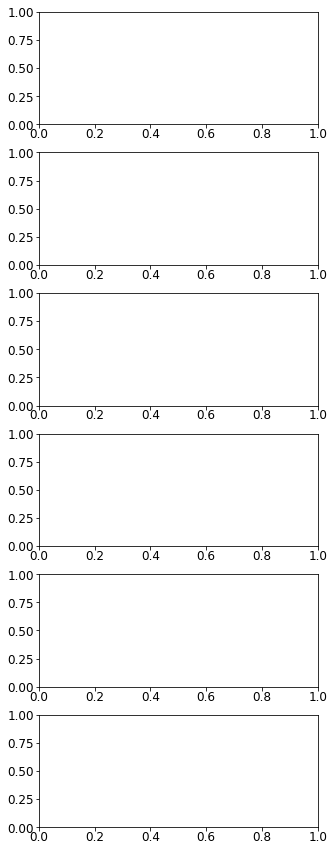

In [12]:
stat_type = "median"
for inlet in ["Bellingham Bay", "Case Inlet", "Sinclair Inlet"]:
    input_netcdf_dir = pathlib.Path(f'/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/NPP_workshop_120622/{inlet.split(" ")[0]}')
    for variable in var_list:
        if (variable not in ssm_nc['2D']) and (variable not in ['depth']):
            input_file = input_netcdf_dir/f"{variable}_{inlet.split(' ')[0]}_2DLevelsTime.nc"
            with xarray.open_dataset(input_file) as ds:
                print([*ds])
                ts2d=ds[f'{variable}_median']
                # for stat in ["min","max"]:
                #     mn = getattr(numpy,stat)(ds[f'{variable}']).item()
                #     output_df[f"{stat_type} {stat}"][variable] = mn

        
            fig, axs = plt.subplots(6,1, figsize = (5,5*6/2),
            gridspec_kw={
               'width_ratios': [1],
               'height_ratios': [1,1,1,1,1,1], 
                'wspace': 0.25,
                'hspace': 0.25})
            #create mesh
            mesh2d=axs.pcolormesh(dti,[1,2,3,4,5,6,7,8,9,10],ts2d,cmap='RdPu')
            cb=fig.colorbar(
                mesh2d, 
                ax=axs, 
                pad = 0.025, 
                label=f"{ssm_nc['label_dict'][variable]}",
                aspect=5)
            axs.set_ylabel(f"vertical levels")
            axs.set_yticks([0.5,5,9.5])
            axs.set_yticklabels(['10','5','1'])
            axs.set_title(inlet,loc='left')
